# Can Age and Hours Played Predict Whether a Player Subscribes to a Game-Related Newsletter?

#### Evelyn Min

### (1) Data Description:

The data was collected by a UBC research group that used a Minecraft server to study player behaviour. Players' actions were recorded to analyze engagement. This analysis ensures they will have enough server resources and can attract players.

In [1]:
# Import libraries
library(tidyverse)
library(tidymodels)
library(repr)

# Assign dataset (stored on GitHub) to url for easier recall later on
url <- "https://raw.githubusercontent.com/evelynmin/dsci_100_project_proposal/refs/heads/main/players.csv"

# Read dataset and rename columns
url <- read_csv(url, col_names = TRUE)
colnames(url) = c("experience_level", "subscribed", "hashed_email", "played_hours", "name", "gender", "age")

# Convert catagorical values to factors and numerical variables to dbl
url <- url |>
    mutate(experience_level = as.factor(experience_level),
           gender = as.factor(gender), 
           subscribed = as.factor(subscribed),
           played_hours = as.numeric(played_hours),
           age = as.numeric(age))

# Summarize numerical variables, remove missing values
summary_stats <- url |>
    summarize(min_age = min(age, na.rm = TRUE),
              max_age = max(age, na.rm = TRUE),
              mean_age = mean(age, na.rm = TRUE),
              median_age = median(age, na.rm = TRUE),
              sd_age = sd(age, na.rm = TRUE),

              min_played_hours = min(played_hours, na.rm = TRUE),
              max_played_hours = max(played_hours, na.rm = TRUE),
              mean_played_hours = mean(played_hours, na.rm = TRUE),
              median_played_hours = median(played_hours, na.rm = TRUE),
              sd_played_hours = sd(played_hours, na.rm = TRUE))

# Check for missing values (potential issue)
missing_vals <- colSums(is.na(url))

# Count number of observations and variables
observations <- nrow(url)
variables <- ncol(url)

summary_stats
missing_vals
observations
variables

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

min_age,max_age,mean_age,median_age,sd_age,min_played_hours,max_played_hours,mean_played_hours,median_played_hours,sd_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,19,7.389687,0,223.1,5.845918,0.1,28.35734


experience_level       subscribed     hashed_email     played_hours 
               0                0                0                0 
            name           gender              age 
               0                0                2

[1] 196

[1] 7

This dataframe includes 197 observations and 7 variables. Included variables are:
| Variable | Type | Description |
|----------|------|-------------|
| `experience_level` | Factor | Player's experience level. |
| `subscribed` | Factor | Subscribed to newsletter (`Yes`/`No`). |
| `played_hours` | Numeric | Total hours played. |
| `age` | Numeric | Player’s age. |
| `gender` | Factor | Player’s gender. |

Summary statistics are:
| Variable       | Min | Max | Mean | Median | Standard Deviation |
|---------------|-----|-----|------|--------|----|
| **Age**       | 10   | 50   | 20.52062    | 19      | 6.174667  |
| **Played Hours** | 0 | 223.1 | 5.845918    | 0.1      | 28.35734  |

Since `age` is self-reported, missing values exist and players can make mistakes entering values. Also, variables were originally stored as characters, preventing calculation of summary statistics, and causing future issues when visualizing. Column names in the dataset were also not consistent, and were adjusted for tidiness.

### (2) Questions:

#### Broad Question:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific Question:
Can age and hours played predict whether a player subscribes to a game-related newsletter?

#### Variables Used:
- **Exploratory Variables:**
    - `age`
    - `played_hours`
- **Response Variable:**
    - `subscribed`
 
This dataset contains information about the player (`age`), and engagement (`played_hours`). These two values are used to analyze subscription behaviour by comparing between **subscribed** and **non-subscribed** players.

To eventually apply a classification model, we will:
- Convert categorical values to factors
- Ensure numeric values are correctly formatted
- Handle missing values in `age` and `played_hours`
- Standardize data to ensure fair comparisons
- Split data into training and testing sets

### (3) Exploratory Data Analysis and Visualization

Three visualizations will be used to explore `age` and `played_hours`:

- **Bar Plot: Age Distribution**
    - Shows the number of players in each age group
- **Histogram: Played Hours**
    - Displays the distribution of player engagement
- **Scatterplot: Played Hours vs. Age**
    - Identifies patterns between playtime and age
    - Identifies patterns that can influence subscription likelihood

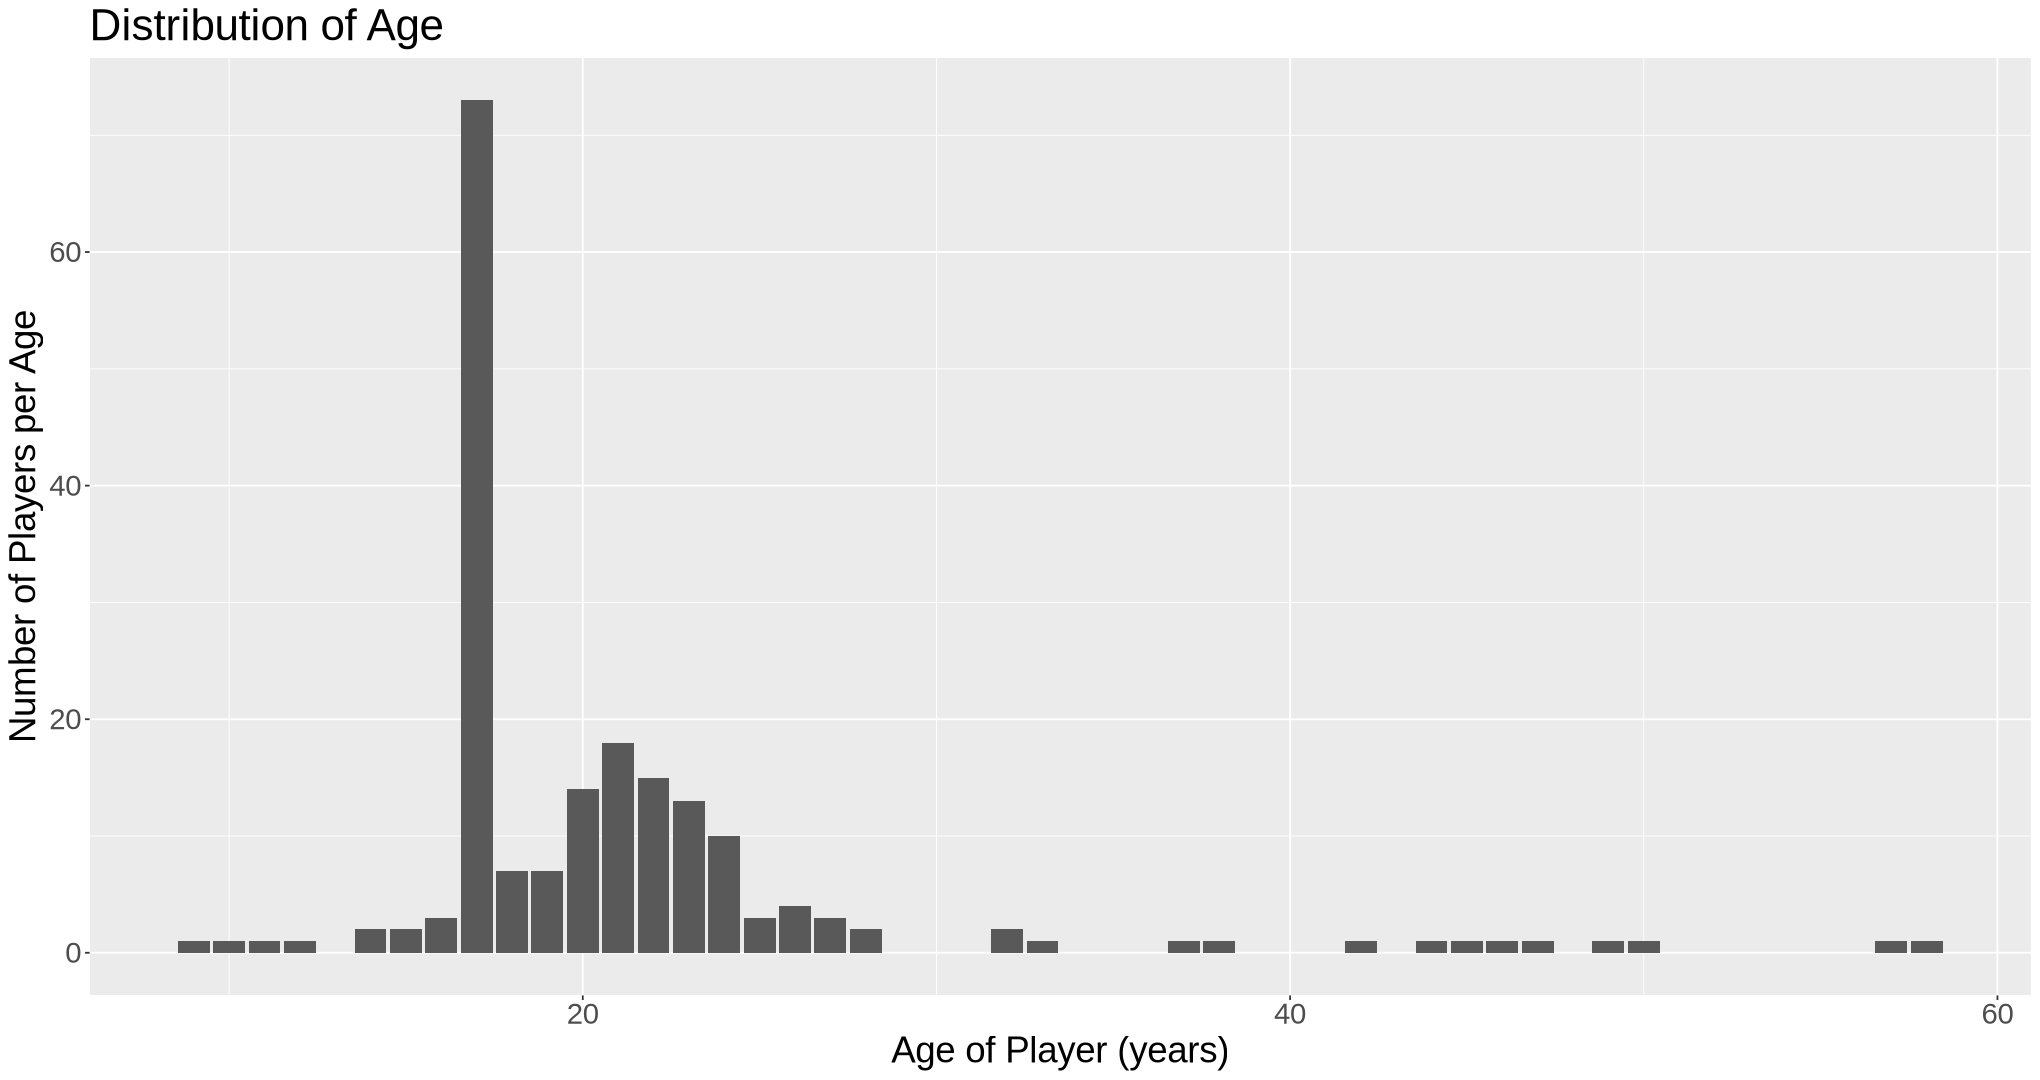

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


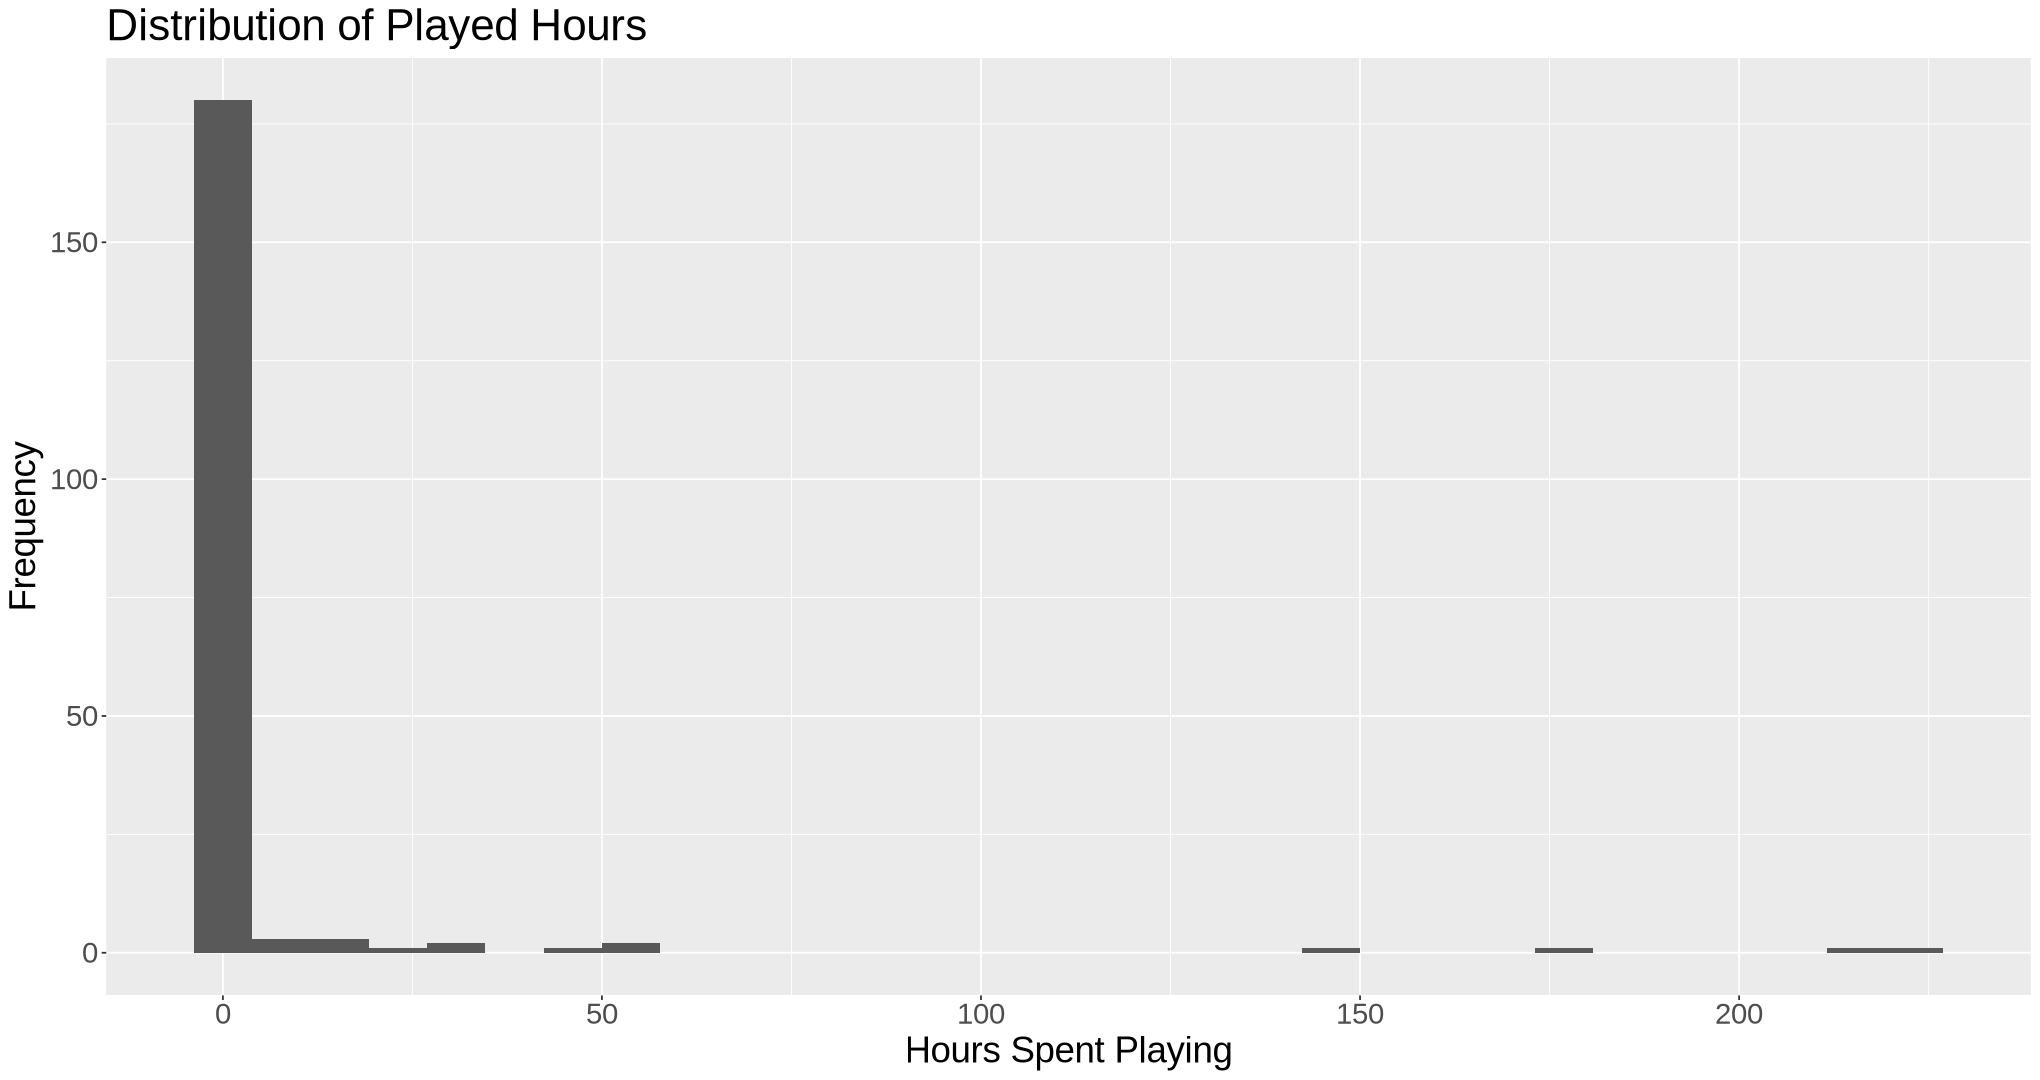

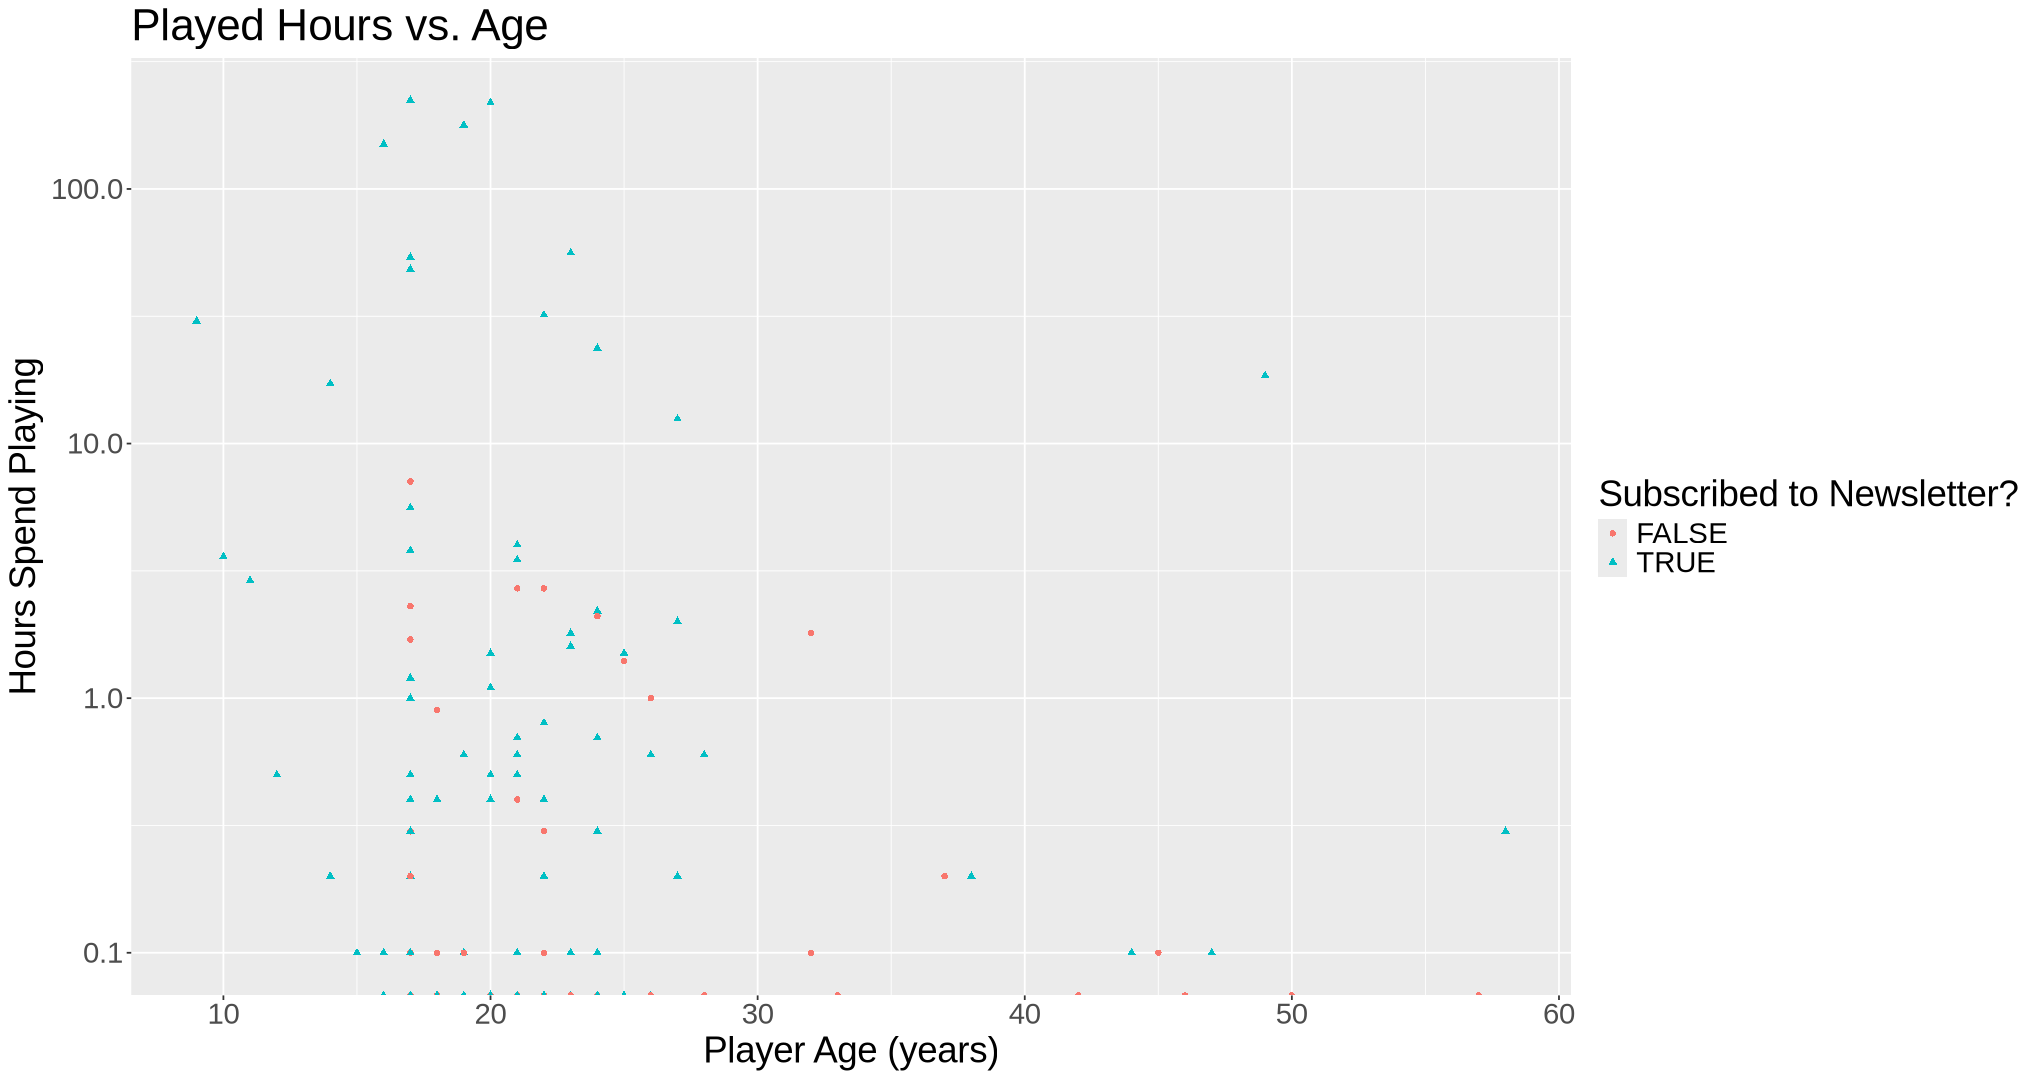

In [2]:
options(repr.plot.width = 17, repr.plot.height = 9)

# Bar Plot: Age Distribution
age_dist <- ggplot(url, aes(x = age)) +
    geom_bar(na.rm = TRUE) +
    labs(title = "Distribution of Age", x = "Age of Player (years)", y = "Number of Players per Age") +
    theme(text = element_text(size = 22))
age_dist

# Histogram: Played Hours
played_hrs <- ggplot(url, aes(x = played_hours)) +
    geom_histogram(bins = 30, na.rm = TRUE) +
    labs(title = "Distribution of Played Hours", x = "Hours Spent Playing", y = "Frequency") +
    theme(text = element_text(size = 22))
played_hrs

#Scatterplot: Played Hours vs. Age
hours_vs_age <- ggplot(url, aes(x = age, y = played_hours, colour = subscribed, shape = subscribed)) +
    geom_point(na.rm = TRUE) +
    labs(title = "Played Hours vs. Age", x = "Player Age (years)", y = "Hours Spend Playing", colour = "Subscribed to Newsletter?", shape = "Subscribed to Newsletter?") +
    scale_y_log10() +
    theme(text = element_text(size = 22))
hours_vs_age

### (4) Methods and Plan

I plan to use the KNN algorithm with classification to analyze this dataset. This method is appropriate because KNN is a distance-based classification method that predicts categorical outcomes (player's subscription status) based on majority vote amongst "K" neighbours. KNN is good because it does not need many assumptions, however, a potential limitation that this method may have is KNN may assume that datasets are standardized (classes are balanced) for correct distance calculations. KNN's biggest limitation is that it becomes very slow as the training data grows, it will not perform well with many predictors, or if the classes are not balanced. To compare and select the model, I will experiment with different K values, and will use confusion matrices to calculate the model's accuracy, precision, and recall. Then, I will select the best K value using 5-fold-cross-validation. To process the data to apply the model, I will split the data into 80% training and 20% test sets first. Within the training set, I will create a validation set to "tune" K, using cross validation. Finally, I will apply the model on the untouched test set for evaluation.